# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.
<img src="assets/bricks.jpg">

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

# Data Exploration

<p>How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.</p>

In [3]:
colors = pd.read_csv('data/colors.csv')
colors.head(36)

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
5,4,Red,C91A09,f
6,5,Dark Pink,C870A0,f
7,6,Brown,583927,f
8,7,Light Gray,9BA19D,f
9,8,Dark Gray,6D6E5C,f


In [4]:
colors['name'].nunique()

135

In [5]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


<h3>Understanding LEGO Themes vs. LEGO Sets</h3>

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src='https://i.imgur.com/aKcwkSx.png'></img>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src='https://i.imgur.com/whB1olq.png'>

In [6]:
sets = pd.read_csv('data/sets.csv')

In [7]:
sets.head(10)


,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
6,0015-1,Space Mini-Figures,1979,143,18
7,0016-1,Castle Mini Figures,1978,186,15
8,002-1,4.5V Samsonite Gears Motor Set,1965,1,3
9,003-1,Master Mechanic Set,1966,366,403


In [8]:
sets.tail(10)

,set_num,name,year,theme_id,num_parts
15700,WEETABIX5-1,Weetabix Promotional Lego Village,1976,413,0
15701,WHITEHOUSE-1,Micro White House,2015,598,59
15702,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
15703,WILLIAM-1,Will.i.am,2016,535,3
15704,WISHINGWELL-1,Wishing Well,2013,494,28
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [9]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [10]:
print(sets[sets['year'] == 1949])

      set_num                               name  year  theme_id  num_parts
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534  700.2-1               Large Gift Set (ABB)  1949       365        178
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12


In [11]:
num_parts = sets.sort_values('num_parts', ascending=False)
num_parts.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [12]:
sets_by_year = sets.groupby('year').count()
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


Text(0.5, 1.0, 'Lego Sets released per year')

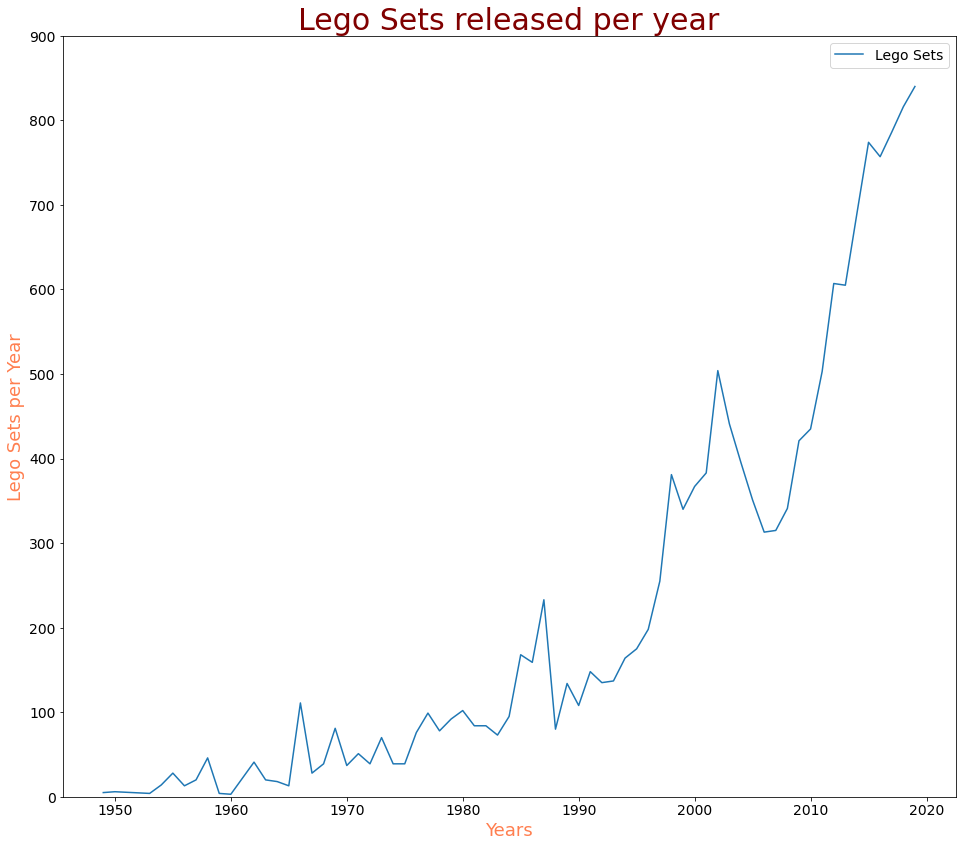

In [13]:
plt.figure(figsize=(16,14))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 900)
plt.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2])
plt.legend(['Lego Sets'], fontsize=14)
plt.xlabel('Years', fontsize=18, color='coral')
plt.ylabel('Lego Sets per Year', fontsize=18, color='coral')
plt.title('Lego Sets released per year', fontsize=30, color='maroon')

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [14]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
print(themes_by_year)

      theme_id
year          
1949         2
1950         1
1953         2
1954         2
1955         4
...        ...
2017        89
2018        93
2019        78
2020        82
2021         1

[71 rows x 1 columns]


In [15]:
themes_by_year.rename(columns = {'theme_id': 'nr_themes'}, inplace = True)

In [16]:
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


Text(0.5, 1.0, 'Lego Themes released per year')

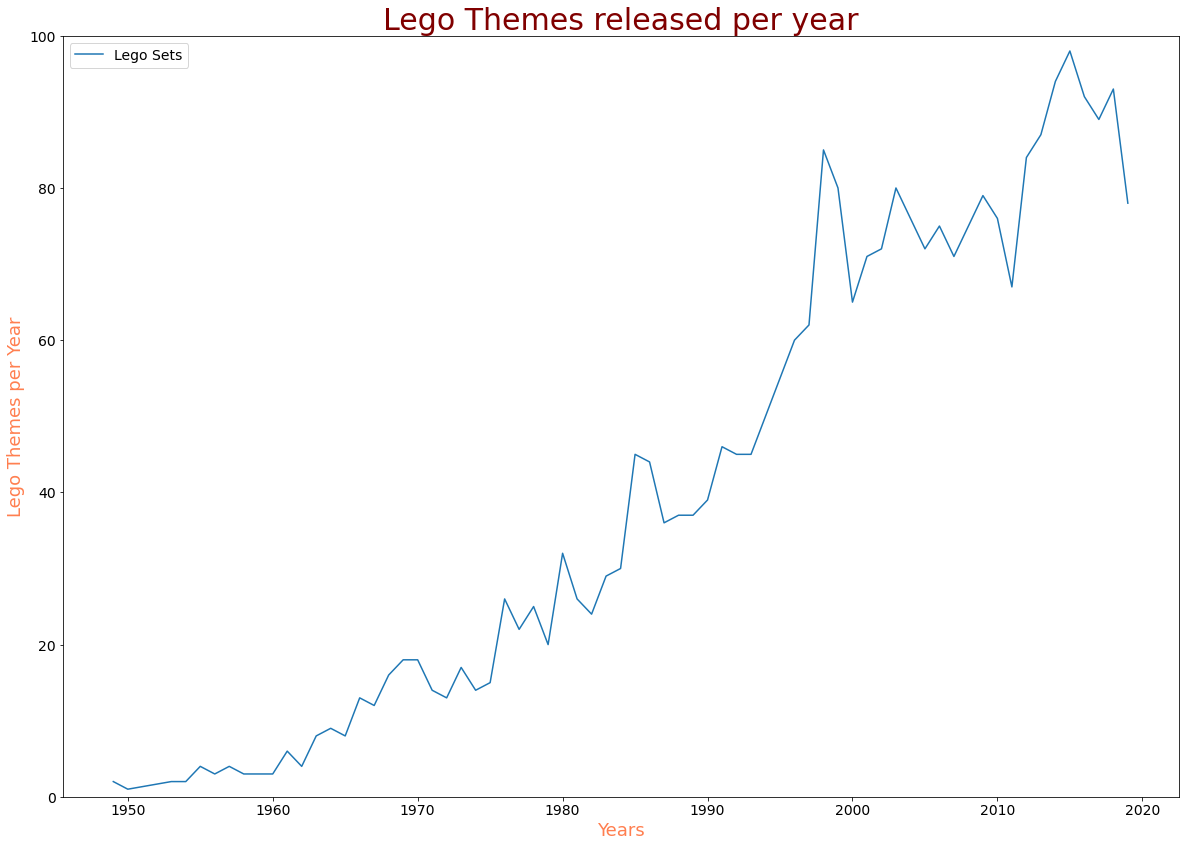

In [30]:
plt.figure(figsize=(20,14))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 100)
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.legend(['Lego Sets'], fontsize=14)
plt.xlabel('Years', fontsize=18, color='coral')
plt.ylabel('Lego Themes per Year', fontsize=18, color='coral')
plt.title('Lego Themes released per year', fontsize=30, color='maroon')

### Line Charts with Two Seperate Axes

Text(0.5, 1.0, 'Lego Data Plot')

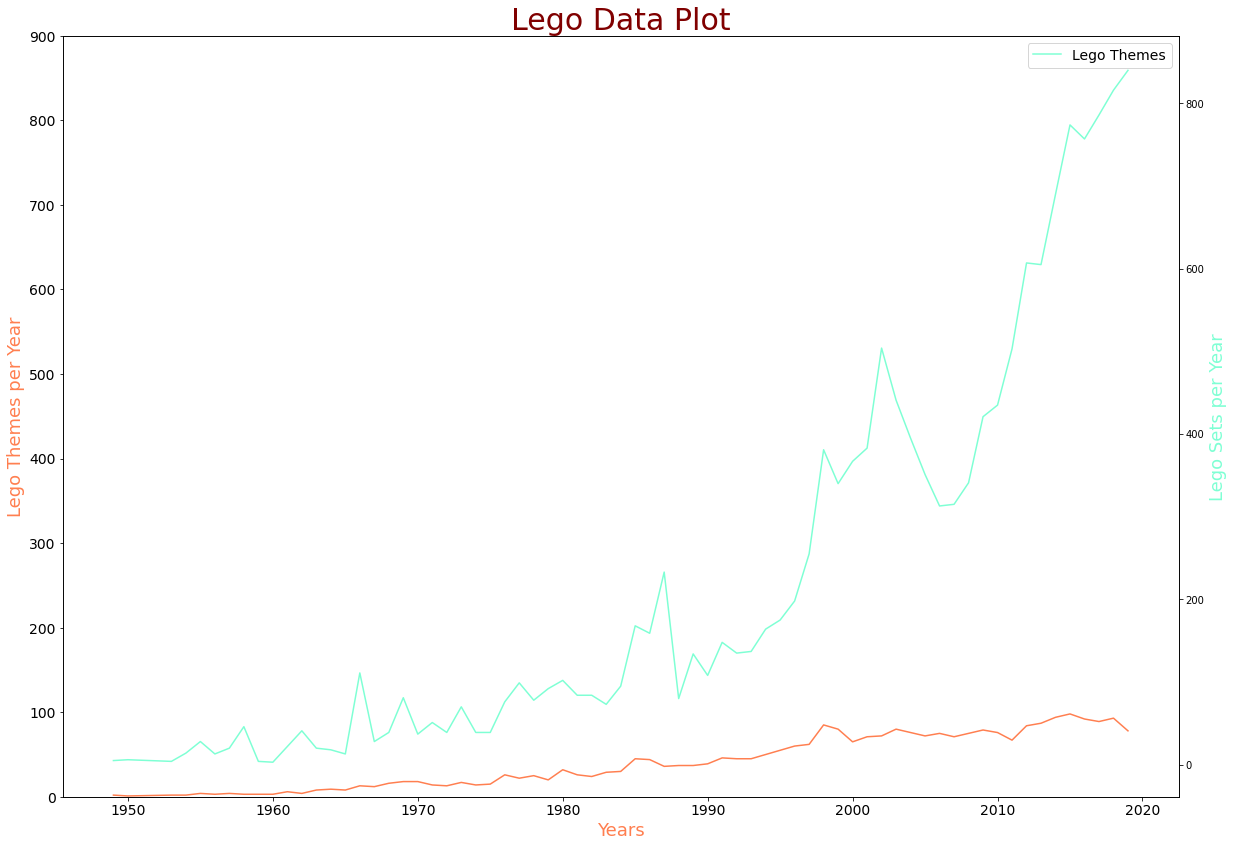

In [18]:
plt.figure(figsize=(20,14))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 900)
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], color='aquamarine')
axes1.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color='coral')
plt.legend(['Lego Themes', 'Lego Sets'], fontsize=14)
axes1.set_xlabel('Years', fontsize=18, color='coral')
axes1.set_ylabel('Lego Themes per Year', fontsize=18, color='coral')
axes2.set_ylabel('Lego Sets per Year', fontsize=18, color='aquamarine')
plt.title('Lego Data Plot', fontsize=30, color='maroon')

In [19]:
partsperset = sets.groupby('year').agg({'num_parts': pd.Series.mean})

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

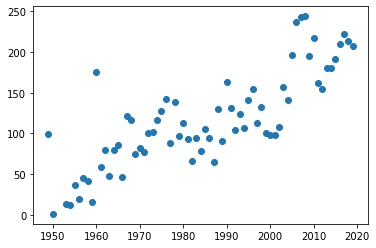

In [20]:

plt.scatter(partsperset.index[:-2], partsperset.num_parts[:-2]);

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [21]:
set_theme_count = sets['theme_id'].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

<img src='https://i.imgur.com/Sg4lcjx.png'></img>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

In [22]:
themes = pd.read_csv('data/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [23]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [24]:
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [25]:
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-10_10-20-45-635c014ae055a295c7e605acb5cd3bc1.jpg"></img>

### Merging (i.e., Combining) DataFrames based on a Key


In [26]:
set_theme_count = sets['theme_id'].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [27]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [28]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:10]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
5,505,328,Basic Set,504.0
6,497,310,Books,NaN
7,632,299,Town,504.0
8,371,273,Supplemental,365.0
9,516,248,Duplo and Explore,507.0


<BarContainer object of 10 artists>

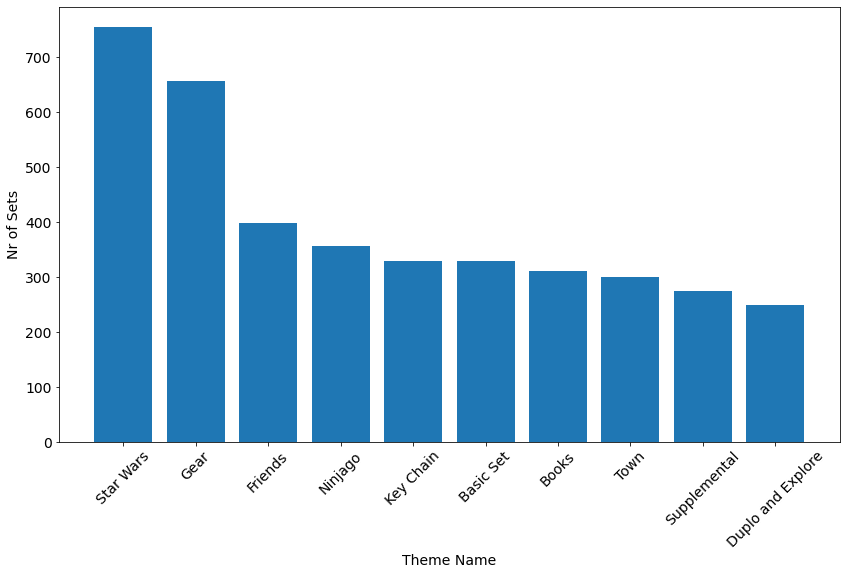

In [29]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:10], merged_df.set_count[:10])